![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)


# Data-X: Introduction to Neural Network

**Author:** Alexander Fred-Ojala

**Sources:** Francois Chollet, Sebastian Raschka, Aurélien Géron, etc.

**Copright:** Feel free to do whatever you want with this code.

___

----

# Neural Network with TensorFlow and Keras

These tutorials use `tf.keras`, TensorFlow's high-level Python API for building and training deep learning models. To learn more about using Keras with TensorFlow, see the TensorFlow Keras Guide.

TensorFlow 2.x has integrated Keras and all it's functionality. Import all functionality from `tf.keras`

# Why Keras
Modular, powerful and intuitive Deep Learning python library built on TensorFlow, CNTK, Theano.
* Minimalist, user-friendly interface
* Modular
* Deep integration with Tensorflow (`tf.keras`)
* Works on CPUs and GPUs
* Open-source, developed and maintained by a community of contributors, and
publicly hosted on github
* Extremely well documented, lots of working examples: https://keras.io/
* Very shallow learning curve —> it is by far one of the best tools for experimenting, both for beginners and experts
* Easy to extend

# Keras "Hello World" on Iris

### Data preprocessing

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

data = datasets.load_iris()

print(data.DESCR[:980])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== =====


In [2]:
x = data['data']
y = data['target']

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
# one hot encode y
import pandas as pd

y = pd.get_dummies(y).values
y[:5,:]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [5]:
# train test split, plus randomize
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, test_size=0.4,
                                                    random_state=1337,
                                                   shuffle=True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(90, 4)
(90, 3)
(60, 4)


### The Sequential model
The simplest model in Keras is the Sequential model, a linear stack of layers. In Keras, you assemble layers to build models. A model is (usually) a graph of layers. The most common type of model is a stack of layers: the tf.keras.Sequential model.

To build a simple, fully-connected network (i.e. multi-layer perceptron):

* **Sequential model** Allows us to build NNs like legos, by adding one layer on top of the other, and swapping layers

In [ ]:
# Core data structure in Keras is a model
# The model is an object in which we organize layers

In [6]:
# model initialization
from tensorflow.keras.models import Sequential

model = Sequential() # instantiate empty Sequential model

We can import layer classes and stack layers (in an NN model for example), by using `.add()`

# Specifying the input shape

The model needs to know what input shape it should expect. For this reason, the first layer in a  Sequential model needs to receive information about its input shape.

**The following snippets are strictly equivalent:**
> * `model.add(Dense(32, input_shape=(784,)))`
> * `model.add(Dense(32, input_dim=784))`

# Construction Phase

In [7]:
# model contruction (architecture build computational graph)
from tensorflow.keras.layers import Dense

model.add( Dense(units=64, activation='relu', \
                 input_shape=(4,) ))

model.add( Dense(units=3, activation='softmax') )

# Compilation phase, specify learning process

Run `.compile()` on the model to specify learning process.

Before training a model, you need to configure the learning process, which is done via the  compile method. It receives three arguments:

* **A loss function:** This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as `categorical_crossentropy` or `mse`), or it can be an objective function.
* **An optimizer:** This could be the string identifier of an existing optimizer (such as `rmsprop`, `gradientdescent`, or `adam`), or an instance of the Optimizer class.
* **(Optional) A list of metrics:** For any classification problem you will want to set this to `metrics=['accuracy']`. A metric could be the string identifier of an existing metric or a custom metric function.

In [8]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

## We can also specify our own optimizer or loss function (even build it ourselves)

```python
# or with we can specify loss function or optimizer

from tensorflow.keras.optimizers import SGD

model.compile(loss = 'categorical_crossentropy',
             optimizer = SGD(lr=0.001, momentum = 0.9, nesterov=True),
             metrics = ['accuracy'])
```

### Different optimizers and their trade-offs
To read more about gradient descent optimizers, hyperparameters etc. This is a recommended reading: http://ruder.io/optimizing-gradient-descent/index.html

### Training
Keras models are trained on Numpy arrays of input data and labels. For training a model, you will typically use the fit function.

In [9]:
# Fit the model by iterating over the training data in batches

model.fit(X_train, y_train, epochs = 50, batch_size= 32)

Train on 90 samples
Epoch 1/50
90/90 [==============================] - 1s 8ms/sample - loss: 1.2440 - accuracy: 0.3556
Epoch 2/50
90/90 [==============================] - 0s 67us/sample - loss: 1.1639 - accuracy: 0.3667
Epoch 3/50
90/90 [==============================] - 0s 69us/sample - loss: 1.0991 - accuracy: 0.4778
Epoch 4/50
90/90 [==============================] - 0s 84us/sample - loss: 1.0333 - accuracy: 0.5556
Epoch 5/50
90/90 [==============================] - 0s 73us/sample - loss: 0.9772 - accuracy: 0.6000
Epoch 6/50
90/90 [==============================] - 0s 92us/sample - loss: 0.9198 - accuracy: 0.6111
Epoch 7/50
90/90 [==============================] - 0s 77us/sample - loss: 0.8736 - accuracy: 0.6333
Epoch 8/50
90/90 [==============================] - 0s 78us/sample - loss: 0.8430 - accuracy: 0.6000
Epoch 9/50
90/90 [==============================] - 0s 86us/sample - loss: 0.8017 - accuracy: 0.5778
Epoch 10/50
90/90 [==============================] - 0s 91us/sample - lo

In [10]:
# # Evaluate the model Accuracy on test set
model.evaluate(X_test, y_test,verbose=False)[1]

0.98333335

In [11]:
# Predictions on new data:

class_probabilities = model.predict(X_test)

# gives output of the softmax function

In [12]:
class_probabilities[:5,:]

array([[0.0735921 , 0.57182676, 0.3545812 ],
       [0.8469639 , 0.14558475, 0.00745141],
       [0.0100765 , 0.41334435, 0.5765792 ],
       [0.78902245, 0.19809067, 0.01288692],
       [0.00633049, 0.36085504, 0.6328145 ]], dtype=float32)

# MNIST: Intro to NN in TensorFlow

Example taken from Google Docs

We are now going to recognize hand-written digits.

![https://www.tensorflow.org/images/MNIST.png](https://www.tensorflow.org/images/MNIST.png)

# About the most classic NN dataset
The MNIST data is split into three parts: 60,000 data points of training data (mnist.train), 10,000 points of test data (mnist.test).

Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We'll call the images "x" and the labels "y". Both the training set and test set contain images and their corresponding labels; for example the training images are mnist.train.images and the training labels are mnist.train.labels.

Each image is 28 pixels by 28 pixels. We can interpret this as a big array of numbers:

![https://www.tensorflow.org/images/MNIST-Matrix.png](https://www.tensorflow.org/images/MNIST-Matrix.png)

We can flatten this array into a vector of 28x28 = 784 numbers. It doesn't matter how we flatten the array, as long as we're consistent between images. From this perspective, the MNIST images are just a bunch of points in a 784-dimensional vector space, with a very rich structure (warning: computationally intensive visualizations).

Flattening the data throws away information about the 2D structure of the image. Isn't that bad? Well, the best computer vision methods do exploit this structure, and we will in later tutorials. But the simple method we will be using here, a softmax regression (defined below), won't.

The result is that mnist.train.images is a tensor (an n-dimensional array) with a shape of [60000, 784]. The first dimension is an index into the list of images and the second dimension is the index for each pixel in each image. Each entry in the tensor is a pixel intensity between 0 and 1, for a particular pixel in a particular image.

![https://www.tensorflow.org/images/mnist-train-xs.png](https://www.tensorflow.org/images/mnist-train-xs.png)

Each image in MNIST has a corresponding label, a number between 0 and 9 representing the digit drawn in the image.

# Load in the data

https://en.wikipedia.org/wiki/MNIST_database

In [13]:
# load dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras. \
                            datasets.mnist.load_data()

# Inspect the dataset

In [14]:
# input information
print('Train input shape:',x_train.shape)
print('Test input shape:',x_test.shape)
print('Input data type:',x_train.dtype)

Train input shape: (60000, 28, 28)
Test input shape: (10000, 28, 28)
Input data type: uint8


In [15]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [33]:
print('Min-max values:',np.min(x_train),np.max(x_train))

Min-max values: 0 255


Image:


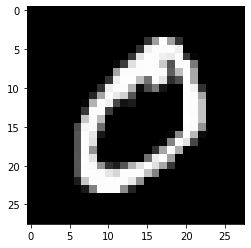

In [16]:
print('Image:')
plt.imshow(x_train[1],cmap='gray');

In [35]:
# Output information:
print('Train output shape:',y_train.shape)
print('Test output shape:',y_test.shape)
print('Data type:',y_train.dtype)

Train output shape: (60000,)
Test output shape: (10000,)
Data type: uint8


In [17]:
print('Unique labels:',np.unique(y_train))
print('First 10 outputs:')
print(y_train[:10])

Unique labels: [0 1 2 3 4 5 6 7 8 9]
First 10 outputs:
[5 0 4 1 9 2 1 3 1 4]


# Preprocess the data

In [18]:
# Normalize the data, flatten inputs, and convert datatype
x_train = x_train.reshape(60000, 784). \
                    astype('float32') / 255

x_test = x_test.reshape(10000, 784) \
                    .astype('float32') / 255

# Load standard NN components

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
# Initialize model constructor
model = Sequential()
# Add layers sequentially
model.add(Dense(300, activation=tf.nn.relu, \
                    input_shape=(784,)))

# Second..
model.add(Dense(200, activation=tf.nn.relu))

# Third..
model.add(Dense(100, activation=tf.nn.relu))

model.add(Dense(10, activation='softmax'))

In [21]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [22]:
# train the model
NO_EPOCHS = 5
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=NO_EPOCHS,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 90us/sample - loss: 0.2497 - accuracy: 0.9233 - val_loss: 0.1186 - val_accuracy: 0.9647
Epoch 2/5
48000/48000 [==============================] - 4s 81us/sample - loss: 0.1011 - accuracy: 0.9699 - val_loss: 0.0951 - val_accuracy: 0.9739
Epoch 3/5
48000/48000 [==============================] - 4s 85us/sample - loss: 0.0690 - accuracy: 0.9790 - val_loss: 0.1002 - val_accuracy: 0.9732
Epoch 4/5
48000/48000 [==============================] - 4s 86us/sample - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.1208 - val_accuracy: 0.9707
Epoch 5/5
48000/48000 [==============================] - 4s 83us/sample - loss: 0.0415 - accuracy: 0.9879 - val_loss: 0.0979 - val_accuracy: 0.9772


In [42]:
test_scores = model.evaluate(x_test, y_test, verbose=0)
#print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Test accuracy: 0.9791


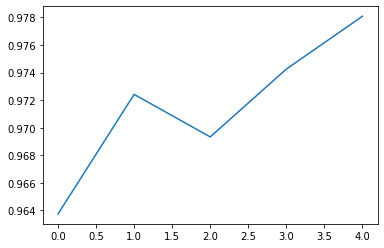

In [43]:
# plot accuracy
plt.plot(range(NO_EPOCHS),history.history['val_accuracy']);

# device placement

In [ ]:
import tensorflow as tf

In [ ]:
# Place tensors on the CPU
with tf.device('/cpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
print(c)


# tf.data.DataSet

In [ ]:
def pre_process(x, y):
    #normalize and expand
    x = tf.cast(x, tf.float32)/255.
    x = tf.expand_dims(x, -1)

    #cast the labels
    y = tf.cast(y, tf.int32)
    return x, y

In [ ]:

def create_dataset(x, y):  
    #convert to tensors and shuffle
    dataset = tf.data.Dataset.from_tensor_slices((x , y)).shuffle(len(x)-1)

    #extract batches
    dataset = dataset.batch(32)

    #preprocess the batch
    dataset = dataset.map(pre_process, num_parallel_calls = 4)

    return dataset

In [ ]:
# Transform data (flatten input, convert to floating point and normalize)
# Then convert to Dataset
dataset = tf.data.Dataset.from_tensor_slices(
    (x_train.reshape(60000, 784).astype('float32') / 255, y_train))
dataset

In [ ]:
# Shuffle the dataset
dataset = dataset.shuffle(buffer_size=60000)
dataset

In [ ]:
# Create batches
dataset = dataset.batch(64)
dataset # creates a new dimension

# (Vanilla) ANN Network structure
* Any Neural Network with one hidden layer can be a Universal Function Approximator. Source: [https://en.wikipedia.org/wiki/Universal_approximation_theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)
* The number of input nodes are equal to the number of features
* The number of output nodes are equal to the number of classes (for classification tasks)
* A bias term is added to every layer that only feeds in a 1, that adds an extra degree of freedom for every functional input value to the next function

# How deep should we go?
* We can overfit Neural Nets, one way to combat that is by using dropout and regularization
* Predictions will usually be better when we increase depth of network and widen it (increase the number of neurons in every layer)

# Activation Functions
* Classically the sigmoid function was used in the hidden layers (simplest function between 0 - 1). Logit function.
* Nowadays it is more common to use the ReLU (Rectified Linear Unit). Much quicker! For deep networks sigmoid might not want to converge at all. Much better to handle exploding and vanishing gradients (Leaky Relu). Can also combat that with *Batch Normalization*.
* For the input layer we send in the (standardized) values.
* For the output layer we often use a softmax function (multi-class classification) or a sigmoid function (binary classification). Softmax only works if the classes are mutually exclusive, i.e. we only try to label one pattern in every training example.


# Training algorithm steps
* Train a model to make a prediction
* Compute distance between predictions and true values
* Modify weights and biases to lower error


# Overfitting
* Mostly because our network has too many degrees of freedom (neurons in the network)
* Can use L1 and L2 regularization on the cost function
* Drop out (used to mitigate the effects of too many degrees of freedom)

# ANNs are not great at classifying images
* We don't make use of the image shapes and curves. Shape info is lost when we flatten arrays.

# ANN One Layer Softmax Classification

What we will accomplish in this section:

- Create a softmax regression function that is a model for recognizing MNIST digits, based on looking at every pixel in the image
- Use Tensorflow to train the model to recognize digits by having it "look" at thousands of examples (and run our first Tensorflow session to do so)
- Check the model's accuracy with our test data

# Advanced tf2 model training

Work in progress (porting to tf2)

In [ ]:
# Define hyperparameters and input size

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [ ]:
# Define neuron layers (ReLU in hidden layers)
# We'll take care of Softmax for output with loss function

def neuron_layer(X, n_neurons, name, activation=None):
    # X input to neuron
    # number of neurons for the layer
    # name of layer
    # pass in eventual activation function
    n_inputs = int(X.shape[1])

    # initialize weights to prevent vanishing / exploding gradients
    stddev = 2 / np.sqrt(n_inputs)
    init = tf.initializers.TruncatedNormal(stddev=stddev)

    # Initialize weights for the layer
    W = tf.Variable(init((n_inputs, n_neurons)), name="weights")
    # biases
    b = tf.Variable(tf.zeros([n_neurons]), name="bias")

    # Output from every neuron
    Z = tf.matmul(X, W) + b
    if activation is not None:
        return activation(Z)
    else:
        return Z

In [ ]:
hidden1 = neuron_layer(x_train, n_hidden1, name="hidden1",
                       activation=tf.nn.relu)
hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                       activation=tf.nn.relu)
logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [ ]:
# Training step with Gradient Descent

learning_rate = 0.001

optimizer = tf.keras.optimizers.Adam(learning_rate)

In [ ]:
# Define loss function (that also optimizes Softmax for output):


# logits are from the last output of the dnn
xentropy = tf.keras.losses.sparse_categorical_crossentropy(y_train, logits, from_logits=True)
loss = tf.reduce_mean(xentropy, name="loss")

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [ ]:
# @tf.function
# def train_step(x, label):
#     with tf.GradientTape() as tape:
#         predictions = model(x)
#         loss = loss_object(label, predictions)
#     gradients = tape.gradient(loss, model.trainable_variables)
#     optimizer.apply_gradients(zip(gradients, model.trainable_variables))
# 
#     train_loss(loss)
#     train_accuracy(label, predictions)